<a href="https://colab.research.google.com/github/sandani98/DataStorm-4.0/blob/main/data-storm-4/Day%204/src/MainNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
data_dict = pd.read_excel(r"/gdrive/MyDrive/DataStorm 4.0/Data-dictionary.xlsx", sheet_name='Sheet1')
store_info = pd.read_csv(r"/gdrive/MyDrive/DataStorm 4.0/Store-info.csv")
historical = pd.read_csv(r"/gdrive/MyDrive/DataStorm 4.0/Historical-transaction-data.csv")
test = pd.read_csv(r"/gdrive/MyDrive/DataStorm 4.0/Testing-data.csv")

In [ ]:
pd.set_option("max_colwidth", None)

data_dict.head(20)

,Attribute,Description,Units
0,item_description,Descriptive name of the items in store,NaN
1,transaction_date,Date of the transaction happened,date
2,invoice_id,Identification of the invoice issued (Unique code for every bill)*,NaN
3,customer_id,Identification for customer (Unique code for each customer),NaN
4,shop_id,Identification for the store (Unique code for each shop),NaN
5,item_price,Selling price of the item,LKR
6,quantity_sold,Show the quantity purchased of item in particular transaction,number of items
7,shop_profile,Store profile indicator,NaN
8,shop_area_sq_ft,Area of the store (indicate the size of the store),Square feet
9,NaN,NaN,NaN


In [ ]:
store_info.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [ ]:
store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   shop_id          124 non-null    object
 1   shop_area_sq_ft  124 non-null    int64 
 2   shop_profile     100 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [ ]:
historical.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [ ]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473974 entries, 0 to 473973
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 25.3+ MB


In [ ]:
merged_df = pd.merge(historical, store_info, left_on='shop_id', right_on='shop_id', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473974 entries, 0 to 473973
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
 7   shop_area_sq_ft   473974 non-null  int64  
 8   shop_profile      387341 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 36.2+ MB


In [ ]:
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,678,Moderate
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,668,Moderate
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,678,Moderate
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,678,Moderate
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,668,Moderate


In [ ]:
merged_df['month'] = pd.DatetimeIndex(merged_df['transaction_date']).month
merged_df['day'] = pd.DatetimeIndex(merged_df['transaction_date']).day
merged_df.drop(['transaction_date', 'invoice_id', 'customer_id'], axis=1, inplace=True)

merged_df.head()

,item_description,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,month,day
0,ORANGE BARLEY 1.5L,SHOP008,220,2,678,Moderate,12,11
1,GINGER BEER 1.5L,SHOP112,220,2,668,Moderate,10,17
2,TONIC PET 500ML,SHOP008,160,2,678,Moderate,12,13
3,CREAM SODA 1L,SHOP008,150,2,678,Moderate,12,13
4,STRAWBERRY MILK 180ML,SHOP112,210,5,668,Moderate,10,23


In [ ]:
merged_df.loc[(merged_df['day'] >= 1) & (merged_df['day'] <= 7), 'week'] = 'w1'
merged_df.loc[(merged_df['day'] >= 8) & (merged_df['day'] <= 14), 'week'] = 'w2'
merged_df.loc[(merged_df['day'] >= 15) & (merged_df['day'] <= 21), 'week'] = 'w3'
merged_df.loc[(merged_df['day'] >= 22) & (merged_df['day'] <= 31), 'week'] = 'w4'

merged_df.drop(['day'], axis=1, inplace=True)

In [ ]:
merged_df['item_description'].value_counts()

GINGER BEER 1.5L                59864
CREAM SODA 1.5L                 39608
CREAM SODA 500ML                34320
GINGER BEER 1L                  26808
ORANGE BARLEY 1.5L              23180
NECTO 1.5L                      21746
SODA 500ML                      16802
BOTTLED DRINKING WATER 500ML    15786
SODA PET 1.5L                   15652
FIT O ORANGE 1L                 15392
LEMONADE 1.5L                   13433
SODA 1L                         13151
TONIC PET 500ML                 12704
GINGER BEER 500ML               11939
CREAM SODA APPLE POP 1L         11736
FIT O ORANGE 200ML               9490
BOTTLED DRINKING WATER 1.5L      9194
ORANGE CRUSH 1.5L                8288
FIT O MIXED FRUIT 200ML          7618
FIT O MIXED FRUIT 1L             7124
FIT O MANGO 1L                   6664
LEMONADE 500ML                   6453
FIT O MANGO 200ML                6333
GINGER BEER SUGAR FREE 500ML     5980
DRY GINGER ALE PET 500ML         5894
STRAWBERRY MILK 180ML            5530
ORANGE CRUSH

In [ ]:
merged_df['item_description'] = merged_df['item_description'].fillna('NOTAVAILABLE')

merged_df.loc[merged_df['item_description'].str.contains('GINGER'), 'item_description'] = 'GINGER'
merged_df.loc[merged_df['item_description'].str.contains('CREAM SODA'), 'item_description'] = 'CREAM'
merged_df.loc[merged_df['item_description'].str.contains('ORANGE'), 'item_description'] = 'ORANGE'
merged_df.loc[merged_df['item_description'].str.contains('NECTO'), 'item_description'] = 'NECTO'
merged_df.loc[merged_df['item_description'].str.contains('SODA'), 'item_description'] = 'SODA'
merged_df.loc[merged_df['item_description'].str.contains('WATER'), 'item_description'] = 'WATER'
merged_df.loc[merged_df['item_description'].str.contains('LEMONADE'), 'item_description'] = 'LEMONADE'
merged_df.loc[merged_df['item_description'].str.contains('LIME'), 'item_description'] = 'LEMONADE'
merged_df.loc[merged_df['item_description'].str.contains('TONIC'), 'item_description'] = 'TONIC'
merged_df.loc[merged_df['item_description'].str.contains('MIXED'), 'item_description'] = 'MIXED'
merged_df.loc[merged_df['item_description'].str.contains('MANGO'), 'item_description'] = 'MANGO'
merged_df.loc[merged_df['item_description'].str.contains('MILK'), 'item_description'] = 'MILK'
merged_df.loc[merged_df['item_description'].str.contains('APPLE'), 'item_description'] = 'APPLE'
merged_df.loc[merged_df['item_description'].str.contains('COLA'), 'item_description'] = 'COLA'

In [ ]:
merged_df['item_description'].value_counts()

GINGER          113735
CREAM            89332
ORANGE           62699
SODA             45605
NOTAVAILABLE     35928
NECTO            27152
WATER            24980
LEMONADE         22188
MIXED            14742
MANGO            12997
TONIC            12704
MILK              5570
APPLE             3930
COLA              2412
Name: item_description, dtype: int64

In [ ]:
merged_df.head()

,item_description,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,month,week
0,ORANGE,SHOP008,220,2,678,Moderate,12,w2
1,GINGER,SHOP112,220,2,668,Moderate,10,w3
2,TONIC,SHOP008,160,2,678,Moderate,12,w2
3,CREAM,SHOP008,150,2,678,Moderate,12,w2
4,MILK,SHOP112,210,5,668,Moderate,10,w4


In [ ]:
!pip install sweetviz

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz

In [ ]:
merged_df['shop_profile'].replace(to_replace=['Low', 'Moderate', 'High'], value=[1, 2, 3], inplace=True)

In [ ]:
merged_df.head()

,item_description,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,month,week
0,ORANGE,SHOP008,220,2,678,2.0,12,w2
1,GINGER,SHOP112,220,2,668,2.0,10,w3
2,TONIC,SHOP008,160,2,678,2.0,12,w2
3,CREAM,SHOP008,150,2,678,2.0,12,w2
4,MILK,SHOP112,210,5,668,2.0,10,w4


In [ ]:
train_df = merged_df.dropna(subset = ['shop_profile'])

                                             |          | [  0%]   00:00 -> (? left)


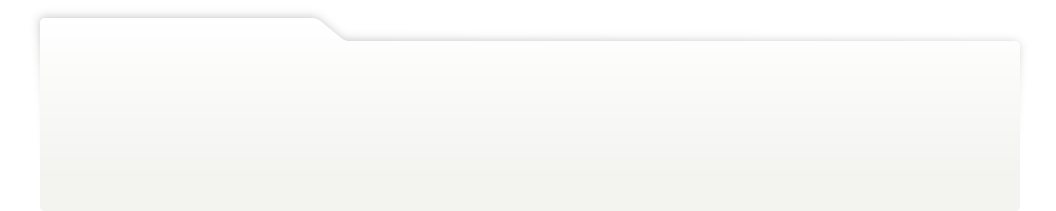
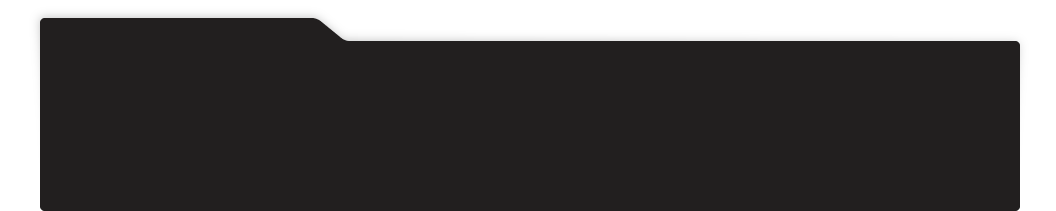
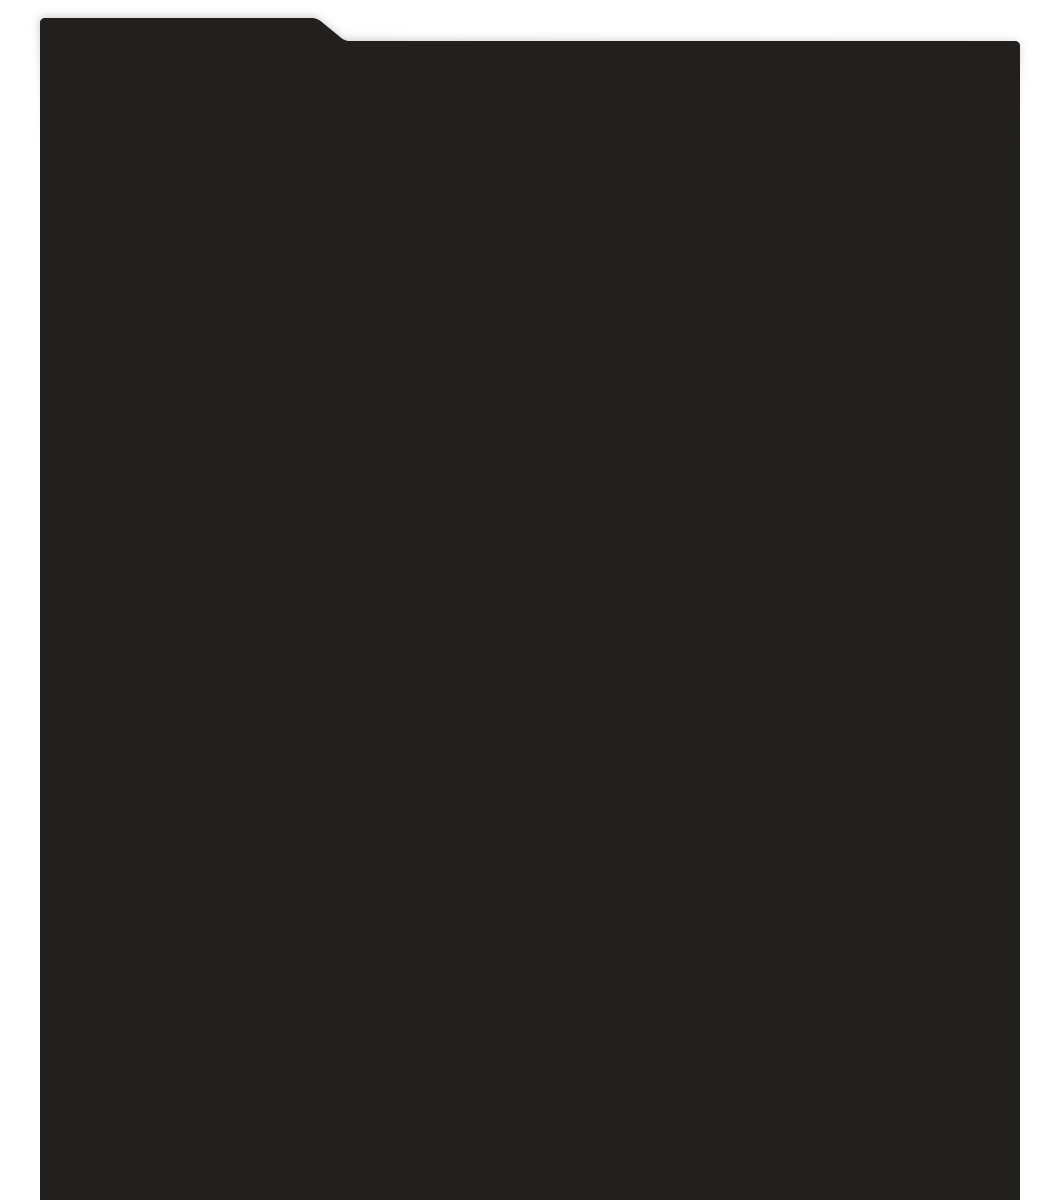
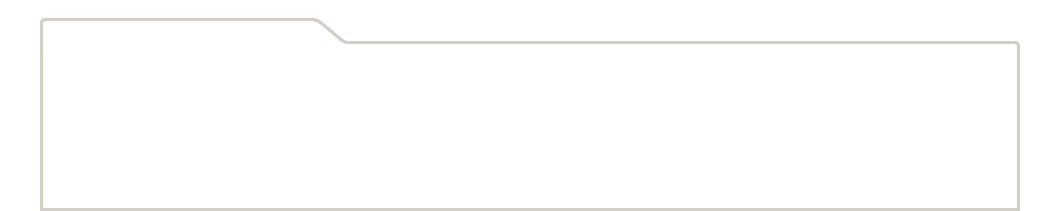
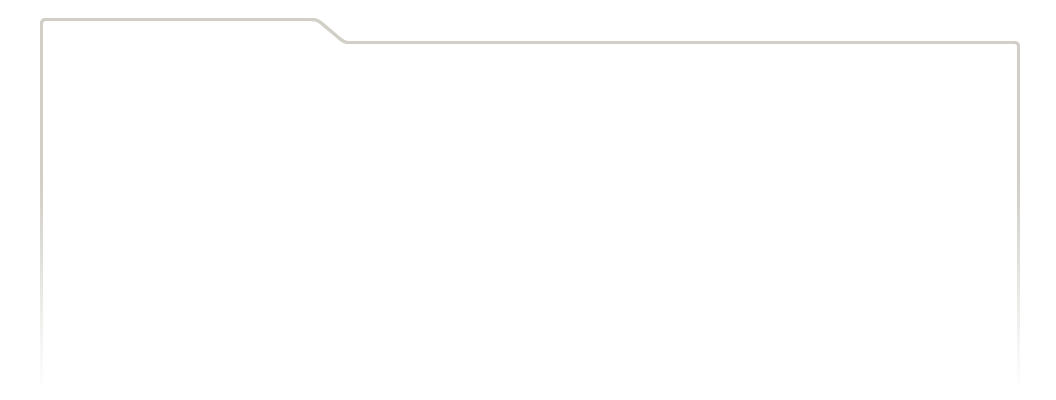
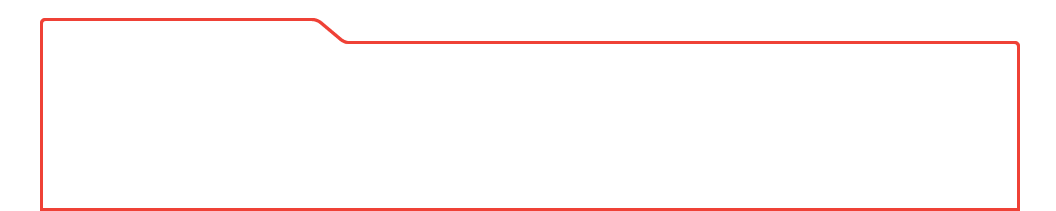
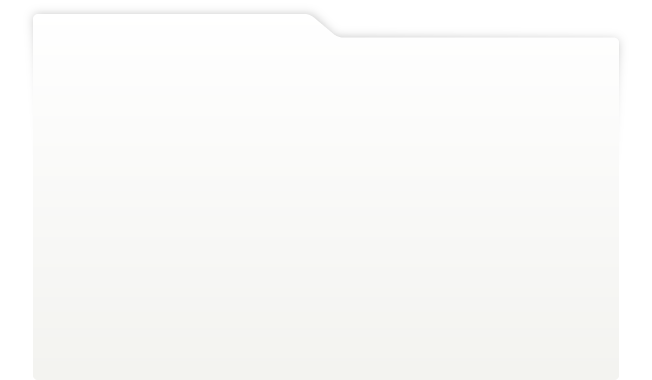
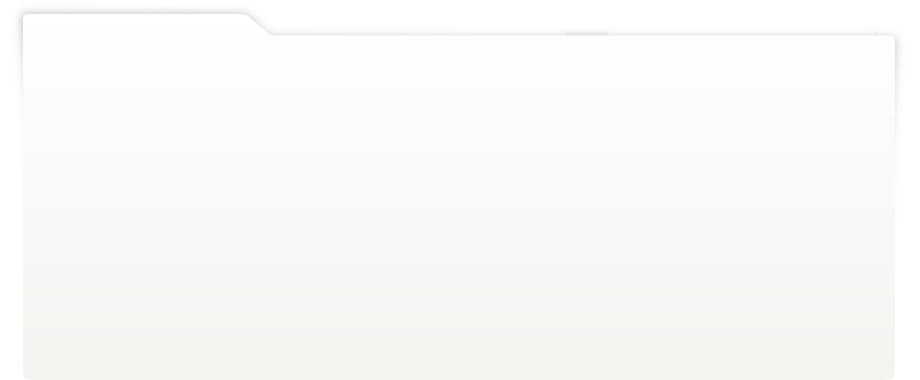
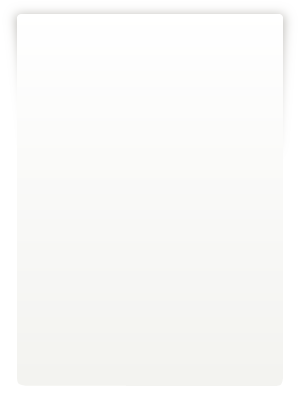
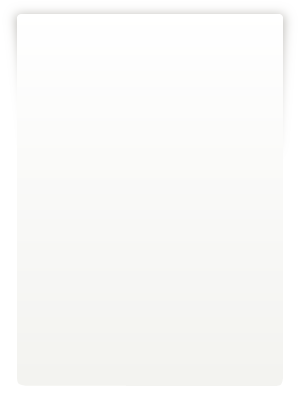
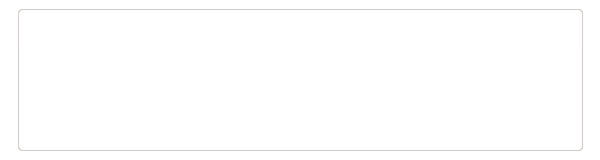
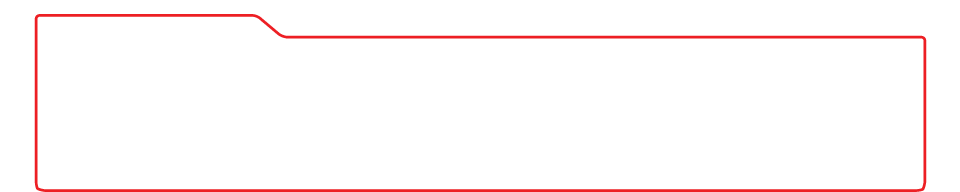
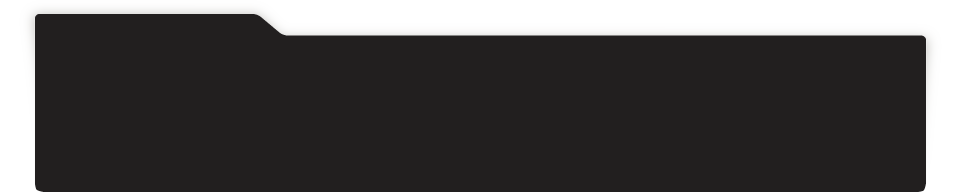
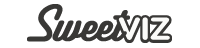
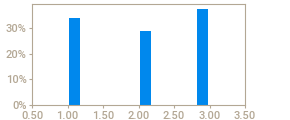
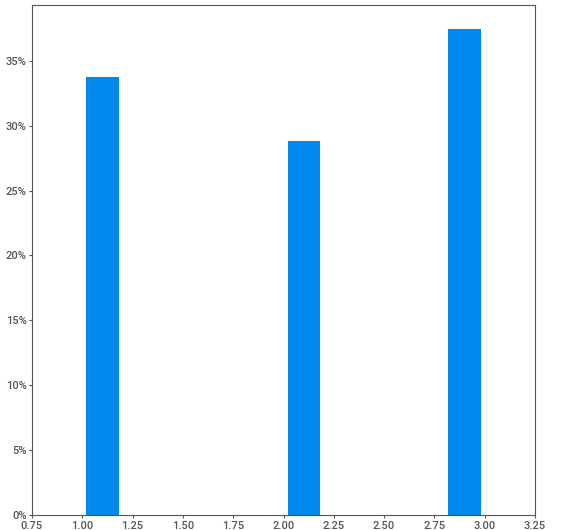
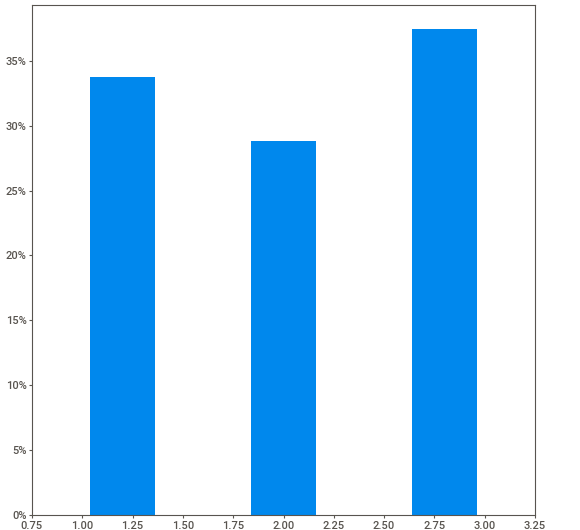
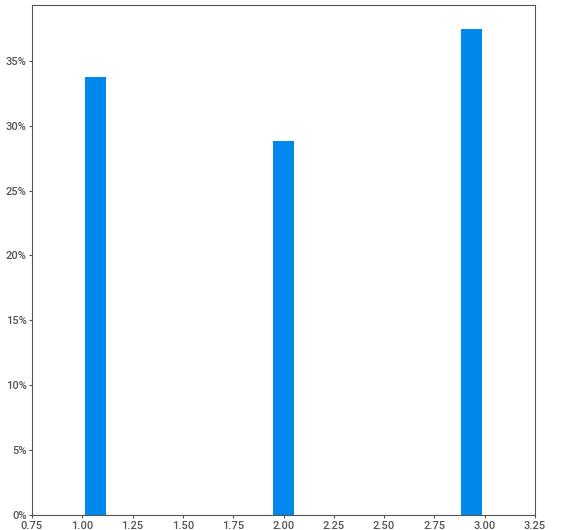
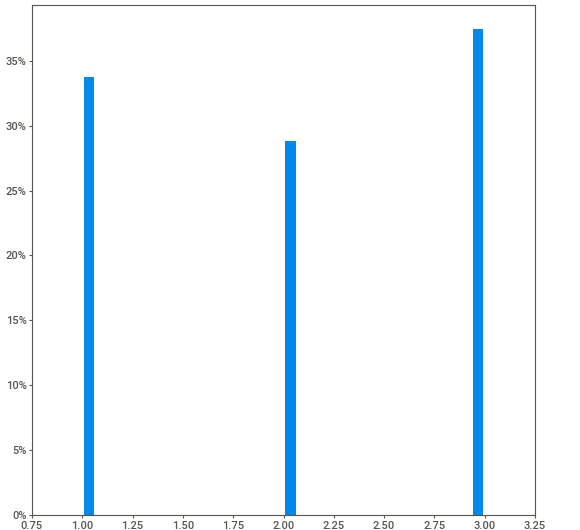
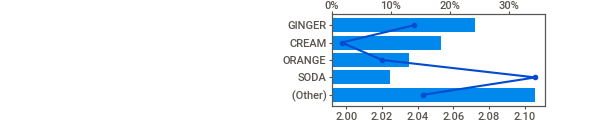
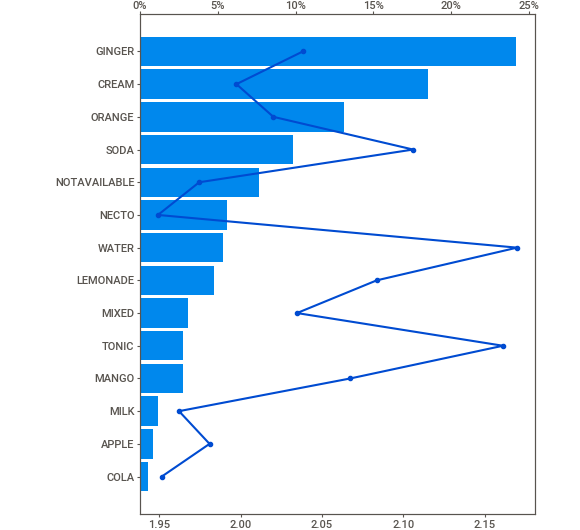
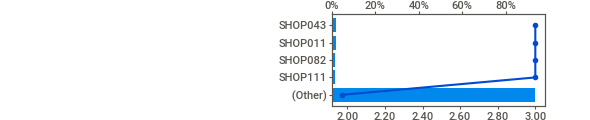
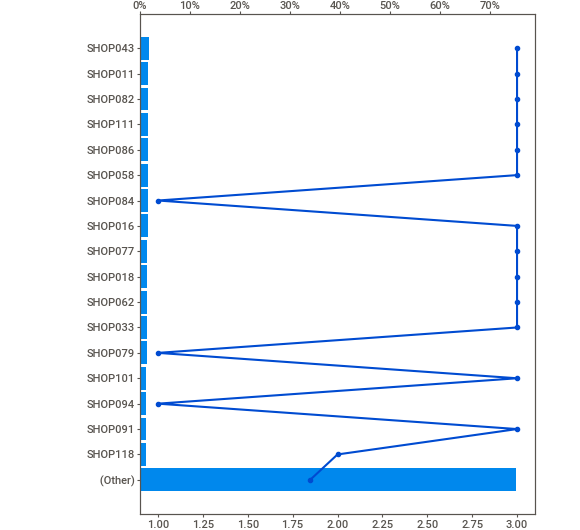
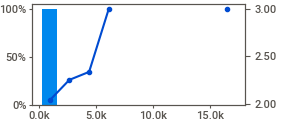
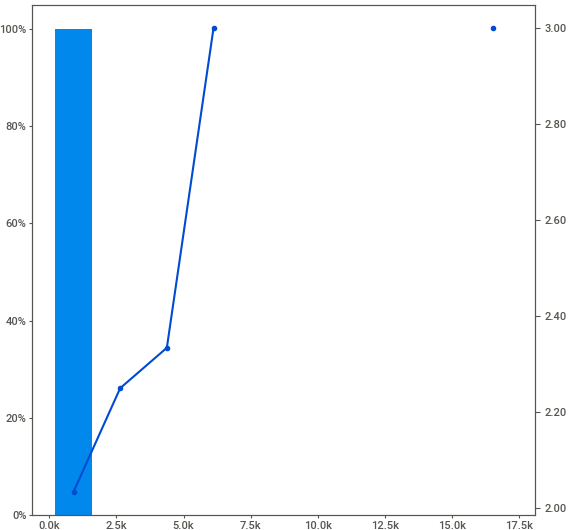
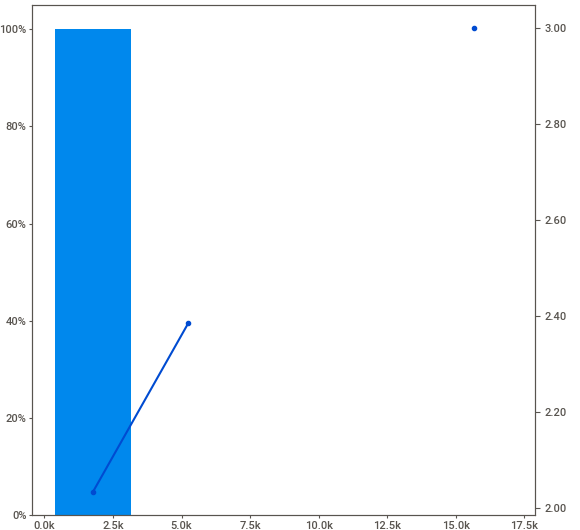
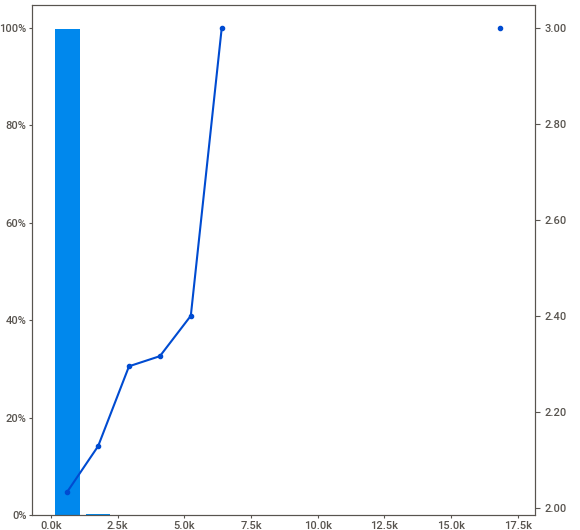
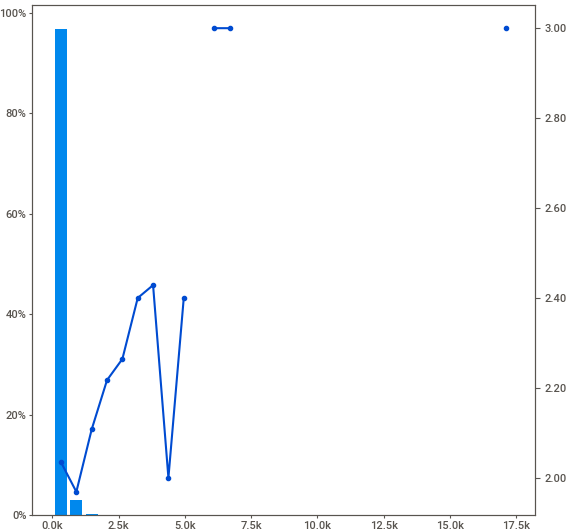
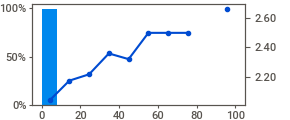
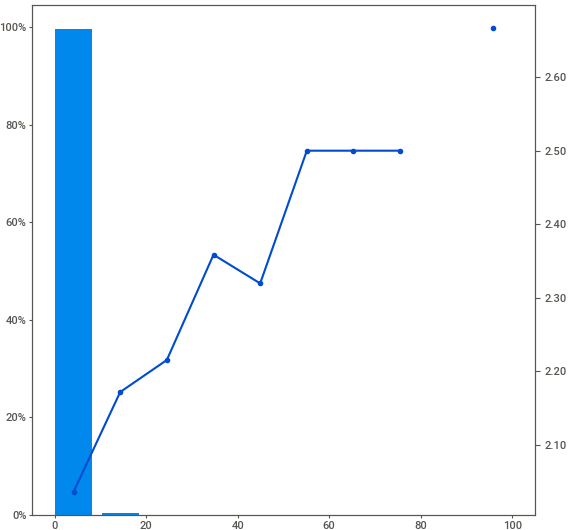
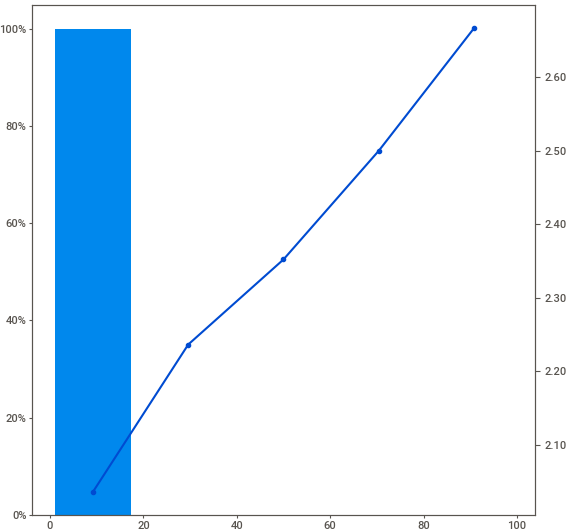
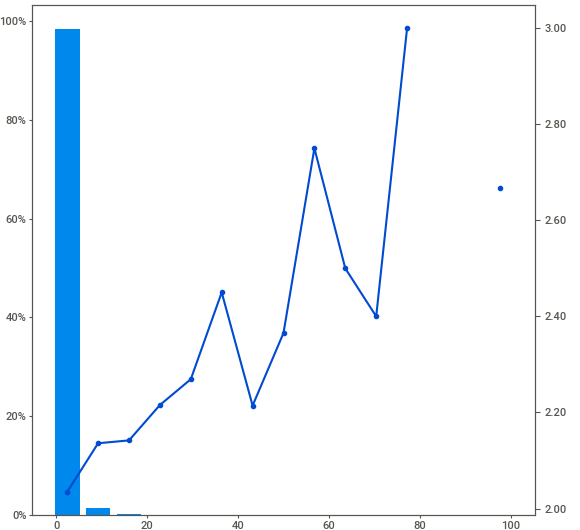
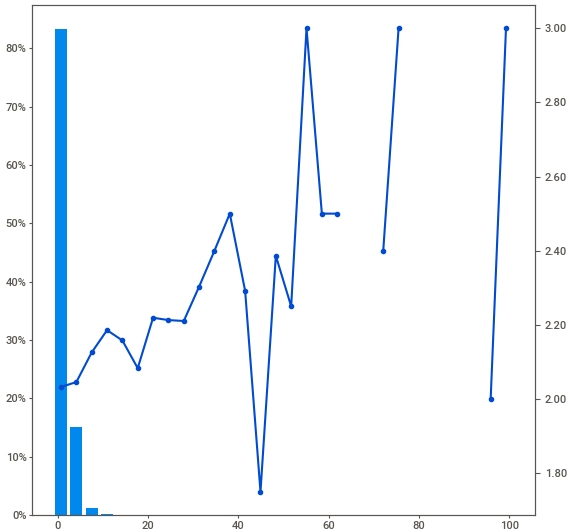
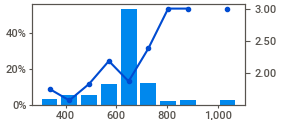
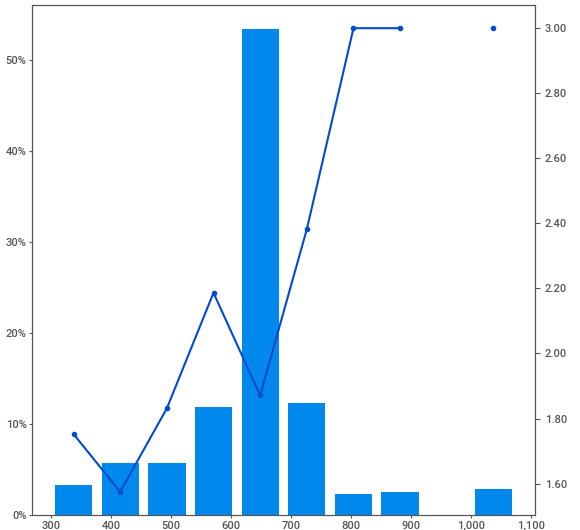
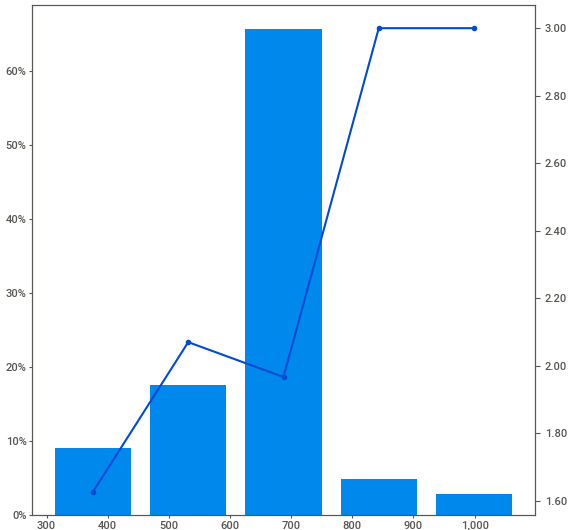
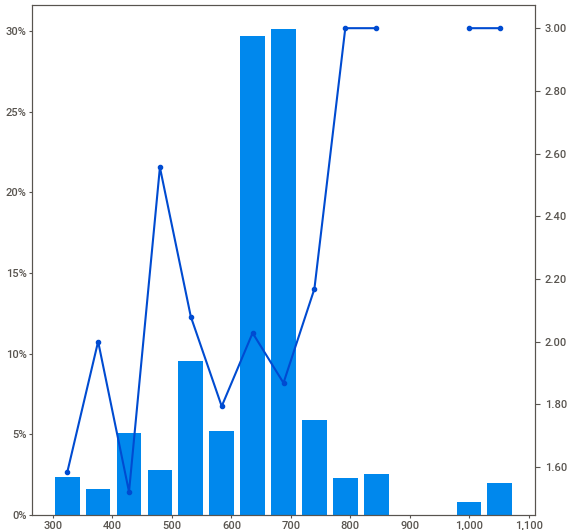
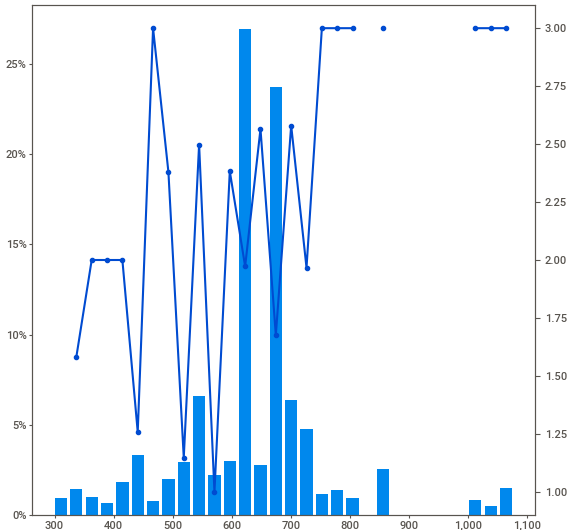
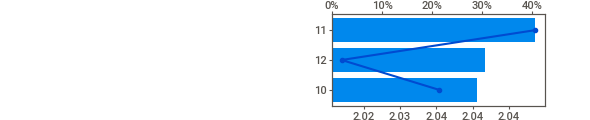
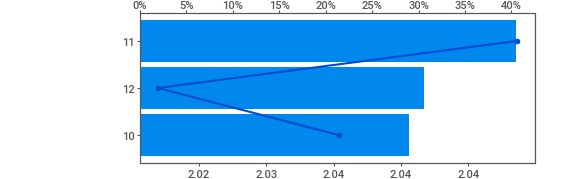
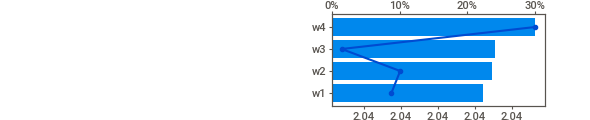
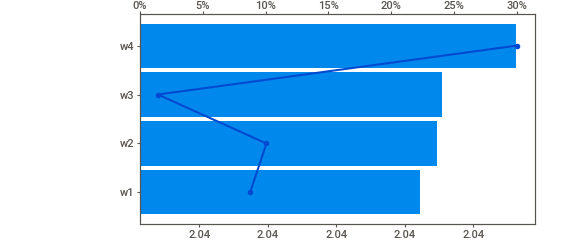
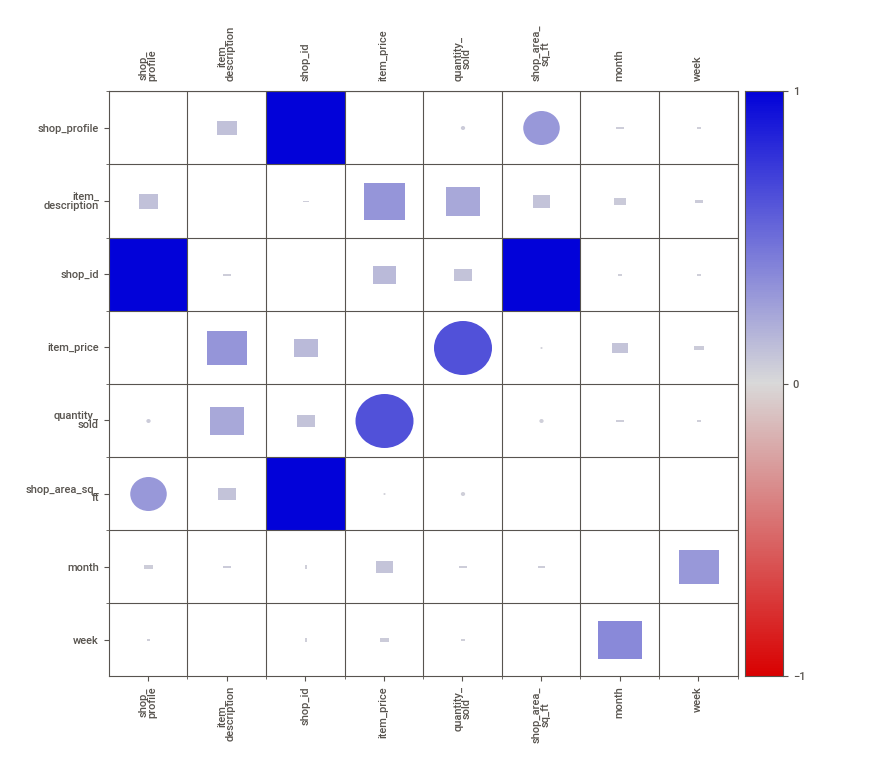
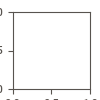

In [ ]:
feature_config = sweetviz.FeatureConfig(force_num=["shop_profile"])

train_report = sweetviz.analyze([train_df, 'Train'], "shop_profile", feature_config)
train_report.show_notebook()

Dataset is well balanced
As for the year, only 2021 is given. Therefore, we can drop that column

In [ ]:
result = merged_df.loc[merged_df['item_price'] > 3000, ['item_description', 'item_price', 'quantity_sold']]
print(result)

       item_description  item_price  quantity_sold
19423             MANGO        4060             59
19424             MIXED        3600             62
25692              SODA        3600             25
27135      NOTAVAILABLE        4900             71
28786              SODA        3360             48
47392          LEMONADE        4400             22
70201            ORANGE        3960             19
91858             WATER        3360             97
100985            TONIC        3840             24
103267            TONIC        3840             25
111667           ORANGE        3770             13
112365            TONIC        3840             24
112867           ORANGE        3080             14
118895           GINGER        3200             19
147791            MIXED        4500             76
150435            WATER        3360             97
159325     NOTAVAILABLE        3360             49
160731            MIXED        4350             16
181234     NOTAVAILABLE        

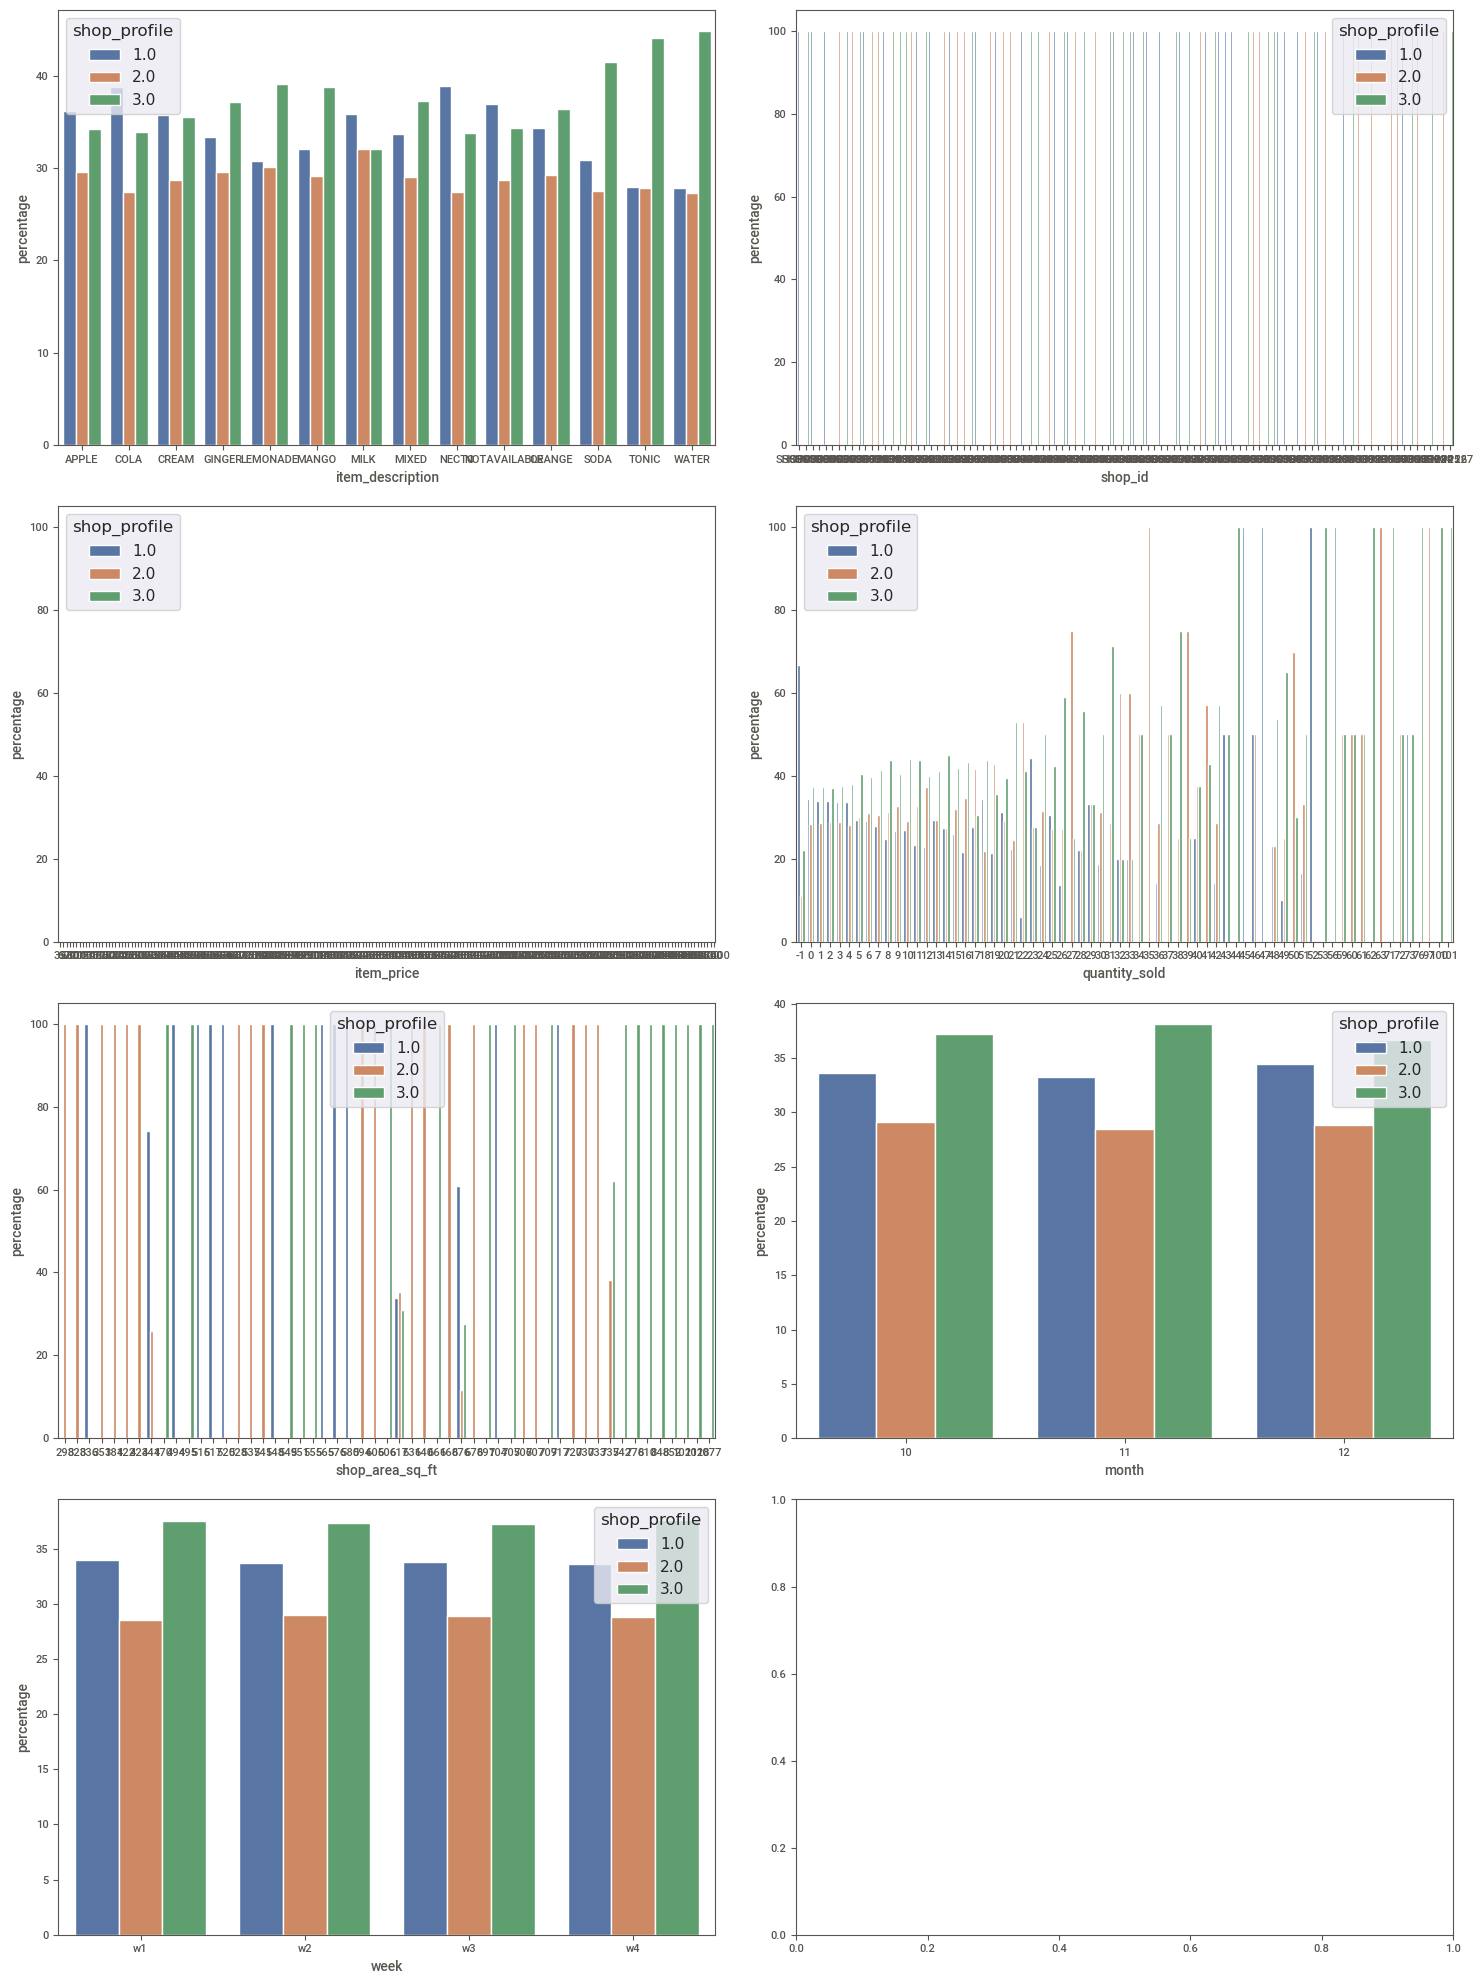

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
sns.set(style="darkgrid")

for col, ax in zip(['item_description', 'shop_id', 'item_price', 'quantity_sold', 'shop_area_sq_ft', 'month',
                    'week'], axes.flatten()):   
    
    shop_profile_counts = (train_df.groupby([col])['shop_profile'].value_counts(normalize=True)
                     .rename('percentage').mul(100).reset_index())
    
    plot = sns.barplot(x=col, y="percentage", hue="shop_profile", data=shop_profile_counts, ax=ax)
    fig.tight_layout()

In [ ]:
new_csv = pd.read_csv('/gdrive/MyDrive/DataStorm 4.0/chalani_store_info_item_price_quantity_sold_per_month.csv')
new_csv.head()

,Unnamed: 0,shop_id,shop_area_sq_ft,shop_profile,ORANGE item_price,GINGER item_price,TONIC item_price,CREAM item_price,MILK item_price,APPLE item_price,...,NECTO 12 quantity_sold,MANGO 10 quantity_sold,MANGO 11 quantity_sold,MANGO 12 quantity_sold,NOTAVAILABLE 10 quantity_sold,NOTAVAILABLE 11 quantity_sold,NOTAVAILABLE 12 quantity_sold,WATER 10 quantity_sold,WATER 11 quantity_sold,WATER 12 quantity_sold
0,0,SHOP047,528,Moderate,220,220,160,220,140,270,...,50,56,52,45,102,222,116,62,80,24
1,1,SHOP009,676,High,290,220,160,220,140,0,...,275,103,48,27,350,656,314,169,210,171
2,2,SHOP083,676,Low,220,220,160,220,70,0,...,240,84,76,22,211,322,213,114,154,69
3,3,SHOP117,676,Low,220,220,160,220,70,0,...,360,104,114,63,195,346,156,43,137,88
4,4,SHOP042,676,Low,220,220,160,220,70,0,...,141,100,49,15,191,327,192,95,122,102


In [ ]:
new_csv.drop(['Unnamed: 0', 'NOTAVAILABLE item_price', 'NOTAVAILABLE 10 quantity_sold', 'NOTAVAILABLE 11 quantity_sold', 'NOTAVAILABLE 12 quantity_sold'], axis=1, inplace=True)

In [ ]:
new_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   shop_id                    124 non-null    object
 1   shop_area_sq_ft            124 non-null    int64 
 2   shop_profile               100 non-null    object
 3   ORANGE item_price          124 non-null    int64 
 4   GINGER item_price          124 non-null    int64 
 5   TONIC item_price           124 non-null    int64 
 6   CREAM item_price           124 non-null    int64 
 7   MILK item_price            124 non-null    int64 
 8   APPLE item_price           124 non-null    int64 
 9   MIXED item_price           124 non-null    int64 
 10  SODA item_price            124 non-null    int64 
 11  COLA item_price            124 non-null    int64 
 12  LEMONADE item_price        124 non-null    int64 
 13  NECTO item_price           124 non-null    int64 
 14  MANGO item

In [ ]:
qty_sold_cols = new_csv.filter(like='quantity_sold')
new_csv['total_qty'] = qty_sold_cols.sum(axis=1)

In [ ]:
new_csv['ORANGE qty_sold'] = new_csv['ORANGE 10 quantity_sold'] + new_csv['ORANGE 11 quantity_sold'] + new_csv['ORANGE 12 quantity_sold']
new_csv['GINGER qty_sold'] = new_csv['GINGER 10 quantity_sold'] + new_csv['GINGER 11 quantity_sold'] + new_csv['GINGER 12 quantity_sold']
new_csv['TONIC qty_sold'] = new_csv['TONIC 10 quantity_sold'] + new_csv['TONIC 11 quantity_sold'] + new_csv['TONIC 12 quantity_sold']
new_csv['CREAM qty_sold'] = new_csv['CREAM 10 quantity_sold'] + new_csv['CREAM 11 quantity_sold'] + new_csv['CREAM 12 quantity_sold']
new_csv['MILK qty_sold'] = new_csv['MILK 10 quantity_sold'] + new_csv['MILK 11 quantity_sold'] + new_csv['MILK 12 quantity_sold']
new_csv['APPLE qty_sold'] = new_csv['APPLE 10 quantity_sold'] + new_csv['APPLE 11 quantity_sold'] + new_csv['APPLE 12 quantity_sold']
new_csv['MIXED qty_sold'] = new_csv['MIXED 10 quantity_sold'] + new_csv['MIXED 11 quantity_sold'] + new_csv['MIXED 12 quantity_sold']
new_csv['SODA qty_sold'] = new_csv['SODA 10 quantity_sold'] + new_csv['SODA 11 quantity_sold'] + new_csv['SODA 12 quantity_sold']
new_csv['COLA qty_sold'] = new_csv['COLA 10 quantity_sold'] + new_csv['COLA 11 quantity_sold'] + new_csv['COLA 12 quantity_sold']
new_csv['LEMONADE qty_sold'] = new_csv['LEMONADE 10 quantity_sold'] + new_csv['LEMONADE 11 quantity_sold'] + new_csv['LEMONADE 12 quantity_sold']
new_csv['NECTO qty_sold'] = new_csv['NECTO 10 quantity_sold'] + new_csv['NECTO 11 quantity_sold'] + new_csv['NECTO 12 quantity_sold']
new_csv['MANGO qty_sold'] = new_csv['MANGO 10 quantity_sold'] + new_csv['MANGO 11 quantity_sold'] + new_csv['MANGO 12 quantity_sold']
new_csv['WATER qty_sold'] = new_csv['WATER 10 quantity_sold'] + new_csv['WATER 11 quantity_sold'] + new_csv['WATER 12 quantity_sold']

In [ ]:
new_csv['ORANGE income'] = new_csv['ORANGE qty_sold'] * new_csv['ORANGE item_price'] 
new_csv['GINGER income'] = new_csv['GINGER qty_sold'] * new_csv['GINGER item_price'] 
new_csv['TONIC income'] = new_csv['TONIC qty_sold'] * new_csv['TONIC item_price'] 
new_csv['CREAM income'] = new_csv['CREAM qty_sold'] * new_csv['CREAM item_price'] 
new_csv['MILK income'] = new_csv['MILK qty_sold'] * new_csv['MILK item_price'] 
new_csv['APPLE income'] = new_csv['APPLE qty_sold'] * new_csv['APPLE item_price'] 
new_csv['MIXED income'] = new_csv['MIXED qty_sold'] * new_csv['MIXED item_price'] 
new_csv['SODA income'] = new_csv['SODA qty_sold'] * new_csv['SODA item_price'] 
new_csv['COLA income'] = new_csv['COLA qty_sold'] * new_csv['COLA item_price'] 
new_csv['LEMONADE income'] = new_csv['LEMONADE qty_sold'] * new_csv['LEMONADE item_price'] 
new_csv['NECTO income'] = new_csv['NECTO qty_sold'] * new_csv['NECTO item_price'] 
new_csv['MANGO income'] = new_csv['MANGO qty_sold'] * new_csv['MANGO item_price'] 
new_csv['WATER income'] = new_csv['WATER qty_sold'] * new_csv['WATER item_price'] 

In [ ]:
new_csv['tot income'] = new_csv['ORANGE income'] + new_csv['GINGER income'] + new_csv['TONIC income'] + new_csv['CREAM income'] + new_csv['MILK income'] + new_csv['APPLE income'] + new_csv['MIXED income'] + new_csv['SODA income'] + new_csv['COLA income'] + new_csv['LEMONADE income'] + new_csv['NECTO income'] + new_csv['MANGO income'] + new_csv['WATER income']

In [ ]:
new_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 83 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   shop_id                    124 non-null    object
 1   shop_area_sq_ft            124 non-null    int64 
 2   shop_profile               100 non-null    object
 3   ORANGE item_price          124 non-null    int64 
 4   GINGER item_price          124 non-null    int64 
 5   TONIC item_price           124 non-null    int64 
 6   CREAM item_price           124 non-null    int64 
 7   MILK item_price            124 non-null    int64 
 8   APPLE item_price           124 non-null    int64 
 9   MIXED item_price           124 non-null    int64 
 10  SODA item_price            124 non-null    int64 
 11  COLA item_price            124 non-null    int64 
 12  LEMONADE item_price        124 non-null    int64 
 13  NECTO item_price           124 non-null    int64 
 14  MANGO item

In [ ]:
train = new_csv.dropna(subset = ['shop_profile'])
test_df = new_csv[new_csv[["shop_profile"]].isna().any(axis=1)]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 83 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   shop_id                    100 non-null    object
 1   shop_area_sq_ft            100 non-null    int64 
 2   shop_profile               100 non-null    object
 3   ORANGE item_price          100 non-null    int64 
 4   GINGER item_price          100 non-null    int64 
 5   TONIC item_price           100 non-null    int64 
 6   CREAM item_price           100 non-null    int64 
 7   MILK item_price            100 non-null    int64 
 8   APPLE item_price           100 non-null    int64 
 9   MIXED item_price           100 non-null    int64 
 10  SODA item_price            100 non-null    int64 
 11  COLA item_price            100 non-null    int64 
 12  LEMONADE item_price        100 non-null    int64 
 13  NECTO item_price           100 non-null    int64 
 14  MANGO item_

In [ ]:
train.drop(['NECTO item_price', 'NECTO 10 quantity_sold', 'NECTO 11 quantity_sold', 'NECTO 12 quantity_sold', 'NECTO income'], axis=1, inplace=True)
test_df.drop(['NECTO item_price', 'NECTO 10 quantity_sold', 'NECTO 11 quantity_sold', 'NECTO 12 quantity_sold', 'NECTO income'], axis=1, inplace=True)

<ipython-input-39-d2469721c0b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['NECTO item_price', 'NECTO 10 quantity_sold', 'NECTO 11 quantity_sold', 'NECTO 12 quantity_sold', 'NECTO income'], axis=1, inplace=True)


In [ ]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

<ipython-input-41-967627a048b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
<ipython-input-41-967627a048b0>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)


In [ ]:
train['split'] = np.random.randn(train.shape[0], 1)

msk = np.random.rand(len(train)) <= 0.7

train_split = train[msk]
val_split = train[~msk]

<ipython-input-42-ae85979f2c68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['split'] = np.random.randn(train.shape[0], 1)


In [ ]:
train_split.to_csv('/content/train.csv')
val_split.to_csv('/content/val.csv')
test_df.to_csv('/content/test.csv')